## Analysis of the MADx sweep for the bump. 

**Watch out** that the output files structure may vary if there are or not the sextupoles

In [2]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import metaclass

# Bump up and down

## With sextupoles

In [3]:
fpath_withSext = '/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/result/'

sexStren = np.empty(0,dtype=float)
bum1 = np.empty(0,dtype=float)
bum2 = np.empty(0,dtype=float)
bum3 = np.empty(0,dtype=float)
bum4 = np.empty(0,dtype=float)

Qx = np.empty(0,dtype=float)
Qy = np.empty(0,dtype=float)

for k in range(1002):
    fname = str(k)
    with open(fpath_withSext+fname+'.out') as f:
        data = f.read()    
        sexStren = np.append(sexStren,float(data.replace('=',';').split(';')[1]))
        bum1 = np.append(bum1,float(data.replace('=',';').split(';')[3]))
        bum2 = np.append(bum2,float(data.replace('=',';').split(';')[5]))
        bum3 = np.append(bum3,float(data.replace('=',';').split(';')[7]))
        bum4 = np.append(bum4,float(data.replace('=',';').split(';')[9]))
        Qx = np.append(Qx,float(data.replace('=',';').split(';')[11]))
        Qy = np.append(Qy,float(data.replace('=',';').split(';')[13]))
        f.close()


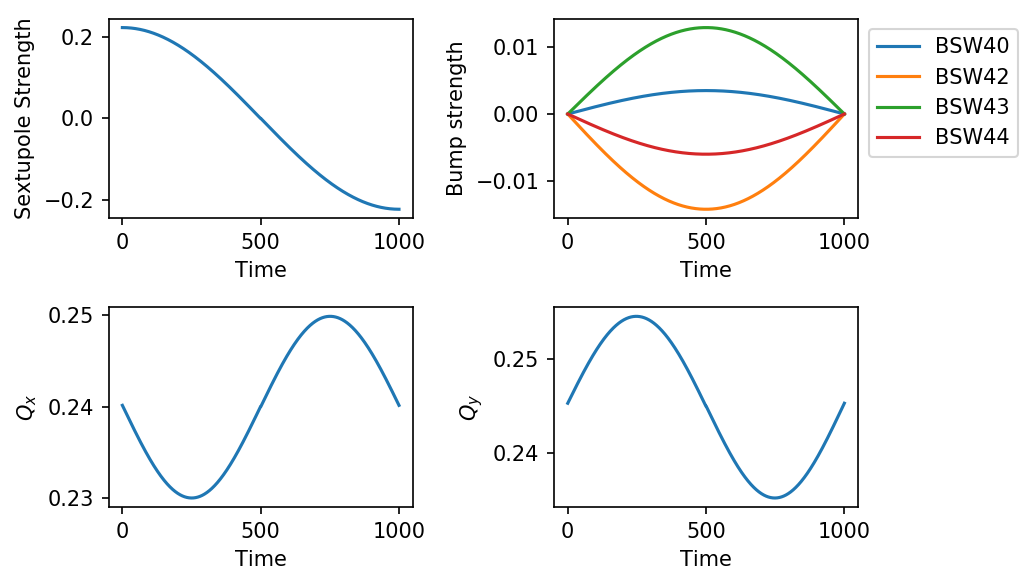

In [4]:
fig, ax = plt.subplots(2,2)
fig.dpi=150

ax[0,0].plot(sexStren)

ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Sextupole Strength')
# ax[0].set_xlim(0,500)


ax[0,1].plot( bum1,label='BSW40')
ax[0,1].plot( bum2,label='BSW42')
ax[0,1].plot( bum3,label='BSW43')
ax[0,1].plot( bum4,label='BSW44')

ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Bump strength')
ax[0,1].legend(bbox_to_anchor=(1, 1))

ax[1,0].plot( Qx,label='Q_x')
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('$Q_x$')

ax[1,1].plot( Qy,label='Q_y')
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('$Q_y$')


plt.tight_layout()

In [87]:
#load the madx output
fpath_withSext = '/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/result/'
firstTime = False

if firstTime == True:
    print('Man, this will take soooo long ....')
    lookAtNum = 4 #look at 4 points in the lattice
    shotNumber = len(Qx)

    betax = np.empty([shotNumber,lookAtNum],dtype=float)
    betay = np.empty([shotNumber,lookAtNum],dtype=float)
    Qpx = np.empty([shotNumber],dtype=float)
    Qpy = np.empty([shotNumber],dtype=float)


    for k in range(shotNumber):
        print(str(k))
        fname = str(k)
        mc = metaclass.twiss(fpath_withSext+fname+'.twiss')
        Qpx[k] = mc.DQ1
        Qpy[k] = mc.DQ2
        # indexes of the elements: 
        # BSEXT40 = 570 (center of PR.BSM40)
        # BSEXT42 = 604 (center of PR.BSM42)
        # BSEXT43 = 625 (center of PR.BSM43)
        # BSEXT44 = 644 (center of PR.BSM44)
        betax[k,0] = mc.BETX[570]
        betax[k,1] = mc.BETX[604]
        betax[k,2] = mc.BETX[625]
        betax[k,3] = mc.BETX[644]
        betay[k,0] = mc.BETY[570]
        betay[k,1] = mc.BETY[604]
        betay[k,2] = mc.BETY[625]
        betay[k,3] = mc.BETY[644]

    # save to files
    with open('/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/betaxBumpers.dat','w') as f:
        f.write('Betax function\n')
        f.write('BSW40,BSW42,BSW43,BSW44\n')
        np.savetxt(f, betax,delimiter=',')

    with open('/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/betayBumpers.dat','w') as f:
        f.write('Betay function\n')
        f.write('/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/BSW40,BSW42,BSW43,BSW44\n')
        np.savetxt(f, betay,delimiter=',')

    with open('/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/chromax.dat','w') as f:
        f.write('X chromaticity\n')
        np.savetxt(f, Qpx,delimiter=',')

    with open('/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/chromay.dat','w') as f:
        f.write('Y chromaticity\n')
        np.savetxt(f, Qpy,delimiter=',')

else:
    betax = np.transpose(np.loadtxt('/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/betaxBumpers.dat',skiprows=2,unpack=True,delimiter=','))
    betay = np.transpose(np.loadtxt('/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/betayBumpers.dat',skiprows=2,unpack=True,delimiter=','))
    Qpx = np.loadtxt('/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/chromax.dat',skiprows=1,unpack=True)
    Qpy = np.loadtxt('/afs/cern.ch/work/e/esenes/madx_scan_condor/runMAD/chromay.dat',skiprows=1,unpack=True)


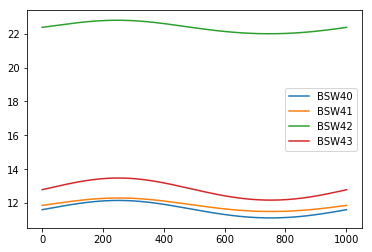

In [50]:
plt.plot(betax[:,0],label='BSM40')
plt.plot(betax[:,1],label='BSM41')
plt.plot(betax[:,2],label='BSM42')
plt.plot(betax[:,3],label='BSM43')

plt.legend()

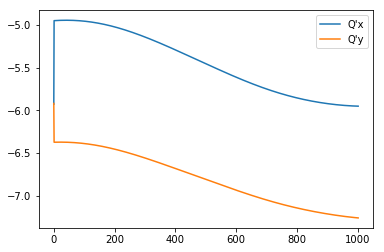

In [51]:
plt.plot(Qpx,label='Q\'x')
plt.plot(Qpy,label='Q\'y')

plt.legend()

In [90]:
# load a reference case to compute the beta beat and chroma beat
fpath_noSext = '/afs/cern.ch/work/e/esenes/madx_scan_condor_noSextupoles/runMAD/result/'

with open(fpath_noSext+'0.out') as f:
    data = f.read()    
    bum1_dw = float(data.replace('=',';').split(';')[1])
    bum2_dw = float(data.replace('=',';').split(';')[3])
    bum3_dw = float(data.replace('=',';').split(';')[5])
    bum4_dw = float(data.replace('=',';').split(';')[7])
    Qx_dw = float(data.replace('=',';').split(';')[9])
    Qy_dw = float(data.replace('=',';').split(';')[11])
    f.close()
print('BSM40='+str(bum1_dw)+'\nBSM42='+str(bum2_dw)+'\nBSM43='+str(bum3_dw)+'\nBSM44='+str(bum4_dw)+'\nQx='+str(Qx_dw)+'\nQy='+str(Qy_dw))
print('\nNow loading twiss ...')

betax_dw = np.empty(4)
betay_dw = np.empty(4)

mc = metaclass.twiss(fpath_noSext+'0.twiss')
Qpx_dw = mc.DQ1
Qpy_dw = mc.DQ2
# indexes of the elements: 
# BSEXT40 = 569 (center of PR.BSM40)
# BSEXT42 = 601 (center of PR.BSM42)
# BSEXT43 = 620 (center of PR.BSM43)
# BSEXT44 = 637 (center of PR.BSM44)
betax_dw[0] = mc.BETX[569]
betax_dw[1] = mc.BETX[601]
betax_dw[2] = mc.BETX[620]
betax_dw[3] = mc.BETX[637]
betay_dw[0] = mc.BETY[569]
betay_dw[1] = mc.BETY[601]
betay_dw[2] = mc.BETY[620]
betay_dw[3] = mc.BETY[637]


BSM40=0.0
BSM42=-0.0
BSM43=0.0
BSM44=-0.0
Qx=0.2401386179
Qy=0.2453163279

Now loading twiss ...
Problem parsing: @ ORBIT_-CT        %le                   0

Going to be parsed as string
Problem persits, let's ignore it!


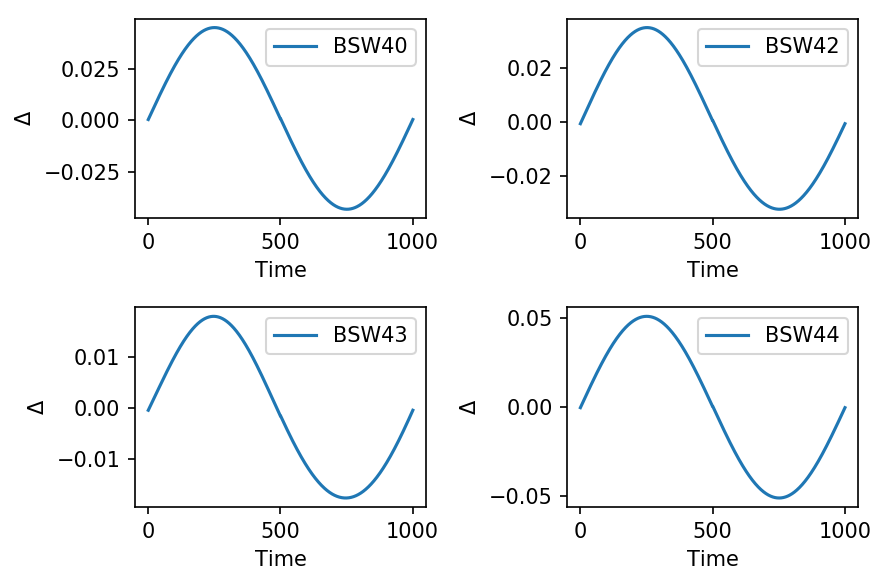

In [99]:
#plot beta beat at the bumper center wrt to the bump down

bbeat40 = (betax[:,0]-betax_dw[0])/betax[:,0]
bbeat42 = (betax[:,1]-betax_dw[1])/betax[:,1]
bbeat43 = (betax[:,2]-betax_dw[2])/betax[:,2]
bbeat44 = (betax[:,3]-betax_dw[3])/betax[:,3]


fig, ax = plt.subplots(2,2)
fig.dpi=150

ax[0,0].plot(bbeat40,label='BSW40')
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('$\Delta\beta / \beta$')
ax[0,0].legend(bbox_to_anchor=(1, 1))


ax[0,1].plot( bbeat42,label='BSW42')
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('$\Delta\beta / \beta$')
ax[0,1].legend(bbox_to_anchor=(1, 1))

ax[1,0].plot(bbeat43,label='BSW43')
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('$\Delta\beta / \beta$')
ax[1,0].legend(bbox_to_anchor=(1, 1))


ax[1,1].plot(bbeat44,label='BSW44')
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('$\Delta\beta / \beta$')
ax[1,1].legend(bbox_to_anchor=(1, 1))


plt.tight_layout()

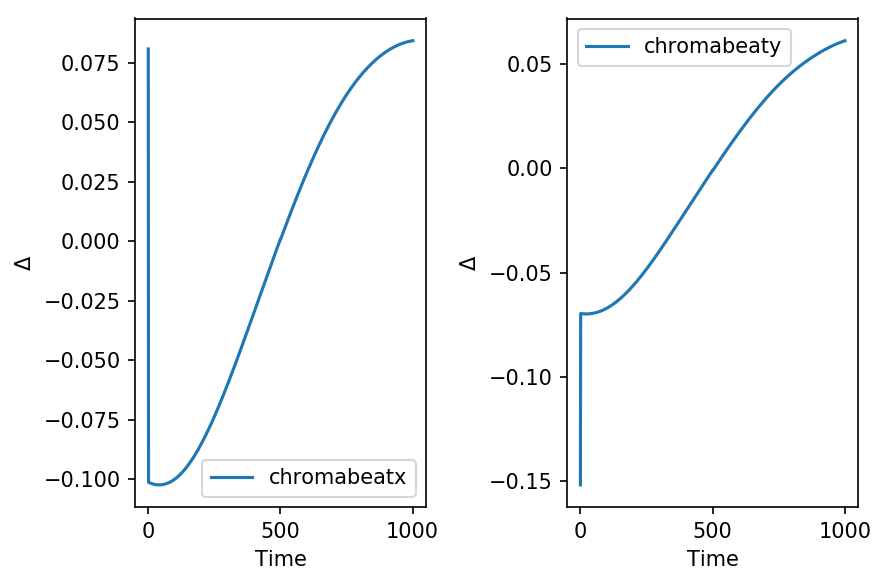

In [106]:
#plot beta beat at the bumper center wrt to the bump down

cbeatx = (Qpx-Qpx_dw)/Qpx
cbeaty = (Qpy-Qpy_dw)/Qpy

fig, ax = plt.subplots(1,2)
fig.dpi=150

ax[0].plot(cbeatx,label='chromabeatx')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('$\Delta$')
ax[0].legend()


ax[1].plot( cbeaty,label='chromabeaty')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('$\Delta$')
ax[1].legend()


plt.tight_layout()

In [ ]:
#same WRT bump up 
# same comparing bump up and down w/o sextupole

## NO sextupoles

In [33]:
fpath_withSext = '/afs/cern.ch/work/e/esenes/madx_scan_condor_noSextupoles/runMAD/result/'

sexStren = np.empty(0,dtype=float)
bum1 = np.empty(0,dtype=float)
bum2 = np.empty(0,dtype=float)
bum3 = np.empty(0,dtype=float)
bum4 = np.empty(0,dtype=float)

Qx = np.empty(0,dtype=float)
Qy = np.empty(0,dtype=float)

for k in range(1002):
    fname = str(k)
    with open(fpath_withSext+fname+'.out') as f:
        data = f.read()    
        bum1 = np.append(bum1,float(data.replace('=',';').split(';')[1]))
        bum2 = np.append(bum2,float(data.replace('=',';').split(';')[3]))
        bum3 = np.append(bum3,float(data.replace('=',';').split(';')[5]))
        bum4 = np.append(bum4,float(data.replace('=',';').split(';')[7]))
        Qx = np.append(Qx,float(data.replace('=',';').split(';')[9]))
        Qy = np.append(Qy,float(data.replace('=',';').split(';')[11]))
        f.close()


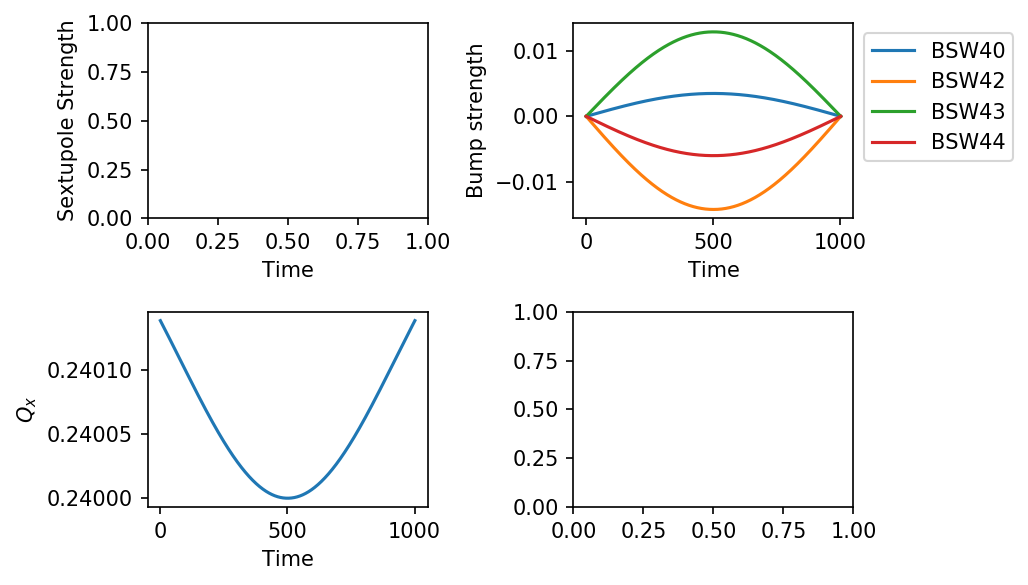

In [34]:
fig, ax = plt.subplots(2,2)
fig.dpi=150

# ax[0,0].plot(sexStren)

ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Sextupole Strength')
# ax[0].set_xlim(0,500)


ax[0,1].plot( bum1,label='BSW40')
ax[0,1].plot( bum2,label='BSW42')
ax[0,1].plot( bum3,label='BSW43')
ax[0,1].plot( bum4,label='BSW44')

ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Bump strength')
ax[0,1].legend(bbox_to_anchor=(1, 1))

ax[1,0].plot( Qx,label='Q_x')
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('$Q_x$')


plt.tight_layout()

### With sextupoles

In [4]:
# golden values for the bump
bsw40              =     0.003498034648 
bsw42              =     -0.01422287844 
bsw43              =      0.01290524313 
bsw44              =    -0.006001526439 
BSS_max = 2*1.11828e-01 #from twiss

In [5]:
nstep = 500.

t = np.arange(0,nstep+1,1)/nstep * np.pi/2
t = np.append(t, t+np.pi/2)
# strengths for the simulation
#sextupole strength
BSS_val = BSS_max*np.cos(t) 

#quadrupole strength
bsw40_val = bsw40*np.sin(t)
bsw42_val = bsw42*np.sin(t)
bsw43_val = bsw43*np.sin(t)
bsw44_val = bsw44*np.sin(t)

assert len(BSS_val) == len(bsw40_val) == len(bsw42_val) == len(bsw43_val) == len(bsw44_val)

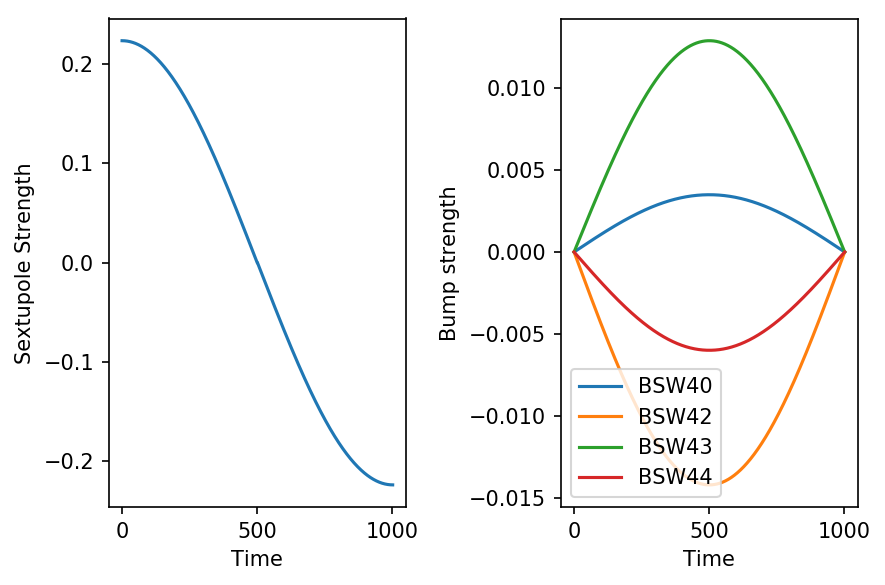

In [6]:
fig, ax = plt.subplots(1,2)
fig.dpi=150

ax[0].plot(BSS_val)

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Sextupole Strength')
# ax[0].set_xlim(0,500)


ax[1].plot( bsw40_val,label='BSW40')
ax[1].plot( bsw42_val,label='BSW42')
ax[1].plot( bsw43_val,label='BSW43')
ax[1].plot( bsw44_val,label='BSW44')

ax[1].set_xlabel('Time')
ax[1].set_ylabel('Bump strength')
# ax[1].set_xlim(0,500)
ax[1].legend()

plt.tight_layout()

In [7]:
# 
sexStren = np.empty(0,dtype=float)
bum1 = np.empty(0,dtype=float)
bum2 = np.empty(0,dtype=float)
bum3 = np.empty(0,dtype=float)
bum4 = np.empty(0,dtype=float)

Qx = np.empty(0,dtype=float)
Qy = np.empty(0,dtype=float)

for k in range(1002):
    fname = str(k)
    with open('./result/'+fname) as f:
        data = f.read()    
        sexStren = np.append(sexStren,float(data.replace('=',';').split(';')[1]))
        bum1 = np.append(bum1,float(data.replace('=',';').split(';')[3]))
        bum2 = np.append(bum2,float(data.replace('=',';').split(';')[5]))
        bum3 = np.append(bum3,float(data.replace('=',';').split(';')[7]))
        bum4 = np.append(bum4,float(data.replace('=',';').split(';')[9]))
        Qx = np.append(Qx,float(data.replace('=',';').split(';')[11]))
        Qy = np.append(Qy,float(data.replace('=',';').split(';')[13]))
        f.close()


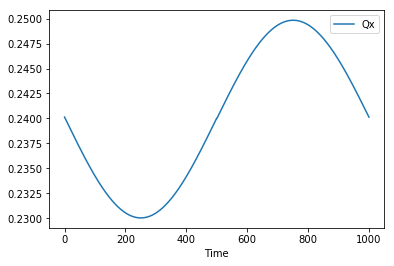

In [8]:
fig, ax = plt.subplots(1)
ax.plot(Qx,label='Qx')
# ax.plot(Qy,label='Qy')
ax.legend()
ax.set_xlabel('Time')

# Write the strength files
files from index 501 to 1001 are the ramp-down of the bump

In [9]:
print(sexStren[501])
print(sexStren[1001])

1.369498023e-17
-0.223656


In [10]:
from scipy.constants import c
nstep = 500

gammar = 2.490380561 #from madx
circumf = 628.3185307

betar = np.sqrt(1-(1/(gammar*gammar)))
Trev = (circumf)/(betar*c)

In [11]:
# I want 4 tables for the 4 sextupoles in the bump
sex40 = -sexStren*(bsw40/bsw42)
sex42 = -sexStren
sex43 = -sexStren*(bsw43/bsw42)
sex44 = -sexStren*(bsw44/bsw42)

In [11]:
with open('/afs/cern.ch/work/e/esenes/simulations/InjectionBump_eddyCurrents/Tables/sext40.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('3'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(sex40[501+k]/6)+' '+str(0.0)+'\n')
    f.close()
with open('/afs/cern.ch/work/e/esenes/simulations/InjectionBump_eddyCurrents/Tables/sext42.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('3'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(sex42[501+k]/6)+' '+str(0.0)+'\n')
    f.close()
with open('/afs/cern.ch/work/e/esenes/simulations/InjectionBump_eddyCurrents/Tables/sext43.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('3'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(sex43[501+k]/6)+' '+str(0.0)+'\n')
    f.close()
with open('/afs/cern.ch/work/e/esenes/simulations/InjectionBump_eddyCurrents/Tables/sext44.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('3'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(sex44[501+k]/6)+' '+str(0.0)+'\n')
    f.close()

In [12]:
with open('/afs/cern.ch/work/e/esenes/simulations/InjectionBump_eddyCurrents/Tables/BSW40.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('1'+'\n') # 1=vary dipole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(bum1[501+k])+' '+str(0.0)+'\n')
    f.close()

with open('/afs/cern.ch/work/e/esenes/simulations/InjectionBump_eddyCurrents/Tables/BSW42.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('1'+'\n') # 1=vary dipole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(bum2[501+k])+' '+str(0.0)+'\n')
    f.close()

with open('/afs/cern.ch/work/e/esenes/simulations/InjectionBump_eddyCurrents/Tables/BSW43.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('1'+'\n') # 1=vary dipole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(bum3[501+k])+' '+str(0.0)+'\n')
    f.close()

with open('/afs/cern.ch/work/e/esenes/simulations/InjectionBump_eddyCurrents/Tables/BSW44.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('1'+'\n') # 1=vary dipole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(bum4[501+k])+' '+str(0.0)+'\n')
    f.close()